# Visualisation des données : 
### Notebook regroupant l'ensemble des codes permettant la visualisation des données via des graphiques, des diagrammes et des matrices pour mieux comprendre nos données et identifier les modèles potentiels.

Pour chaque visualisation, nous parlons de retard (moyen ou pas) en minutes au départ de l'aéroport d'Orly. Les unités de conditions météorologiques sont visibles dans la cellule de code ci-dessous lorsque nous fusionnons nos deux fichiers CSV.

### Fusion de nos deux fichiers csv :

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Charger les datasets
vols = pd.read_csv("vols_orly_nettoyage.csv", parse_dates=['heure_depart_reelle_dt'])
meteo = pd.read_csv("meteo_paris_orly_par_heures_2025_nettoye.csv", parse_dates=['Datetime'])

# Fusion pour associer la météo à l’heure réelle de départ du vol
df = pd.merge_asof(vols.sort_values('heure_depart_reelle_dt'),
                   meteo.sort_values('Datetime'),
                   left_on='heure_depart_reelle_dt',
                   right_on='Datetime')  # Prendre la mesure météo la plus proche avant le vol

print(df.head())

         date date_non_format destination_liste      compagnie       statut  \
0  2025-02-12          12 Feb              Nice     easyJet UK  Parti 19:04   
1  2025-02-12          12 Feb              Nice     Air France  Parti 19:10   
2  2025-02-12          12 Feb          Toulouse     easyJet UK  Parti 19:14   
3  2025-02-12          12 Feb            Madrid        Vueling  Parti 19:17   
4  2025-02-12          12 Feb            Madrid  Qatar Airways  Parti 19:17   

  ville_depart   ville_arrivee heure_depart_prevue heure_depart_reelle  \
0  ORY • Paris      NCE • Nice               19:00               19:04   
1  ORY • Paris      NCE • Nice               19:05               19:10   
2  ORY • Paris  TLS • Toulouse               19:10               19:14   
3  ORY • Paris    MAD • Madrid               19:00               19:17   
4  ORY • Paris    MAD • Madrid               19:00               19:17   

   retard_depart_min  ... Humidité relative (%) Visibilité (Km)  \
0            

In [2]:
# Pour vérifier les datetime

print(vols['heure_depart_reelle_dt'].min(), vols['heure_depart_reelle_dt'].max())
print(meteo['Datetime'].min(), meteo['Datetime'].max())

2025-02-12 19:04:00 2025-05-11 22:25:00
2025-01-01 00:00:00 2025-05-12 17:00:00


<ipython-input-3-6349ac92eefb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trafic_par_heure.index, y=trafic_par_heure.values, palette="Blues_d")


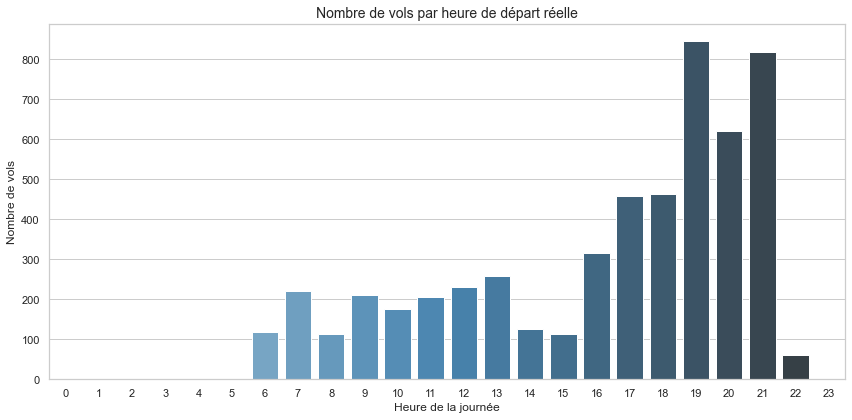

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire l'heure
df["heure_depart_heure"] = df["heure_depart_reelle_dt"].dt.hour

# Compter le nombre de vols par heure
trafic_par_heure = df["heure_depart_heure"].value_counts().sort_index()

# Forcer toutes les heures de 0 à 23 même si certains créneaux sont vides
trafic_par_heure = trafic_par_heure.reindex(range(24), fill_value=0)

# Affichage du graphique
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=trafic_par_heure.index, y=trafic_par_heure.values, palette="Blues_d")

plt.title("Nombre de vols par heure de départ réelle", fontsize=14)
plt.xlabel("Heure de la journée", fontsize=12)
plt.ylabel("Nombre de vols", fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Diagramme en barres du retard moyen par destination :

<ipython-input-18-e1ab7fe67962>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


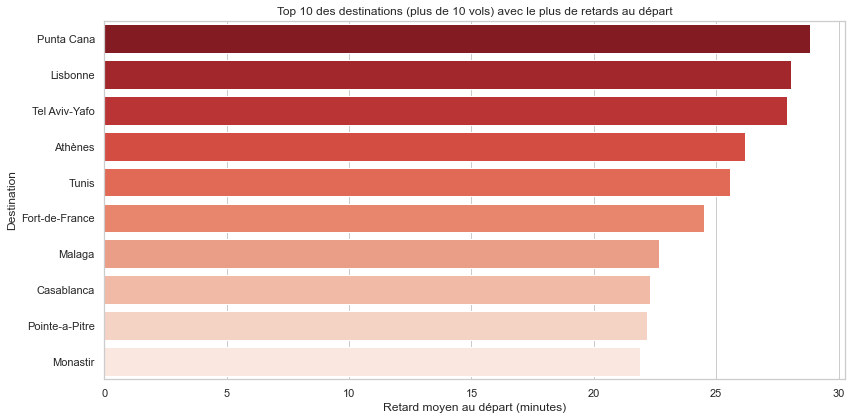

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul du nombre de vols par destination
nombre_vols = df.groupby("destination_liste").size()

# Filtrer les destinations avec plus de 10 vols
destinations_eligibles = nombre_vols[nombre_vols > 10].index

# Calcul du retard moyen uniquement sur ces destinations
retards_par_destination = (
    df[df["destination_liste"].isin(destinations_eligibles)]
    .groupby("destination_liste")["retard_depart_min"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(
    x=retards_par_destination.values,
    y=retards_par_destination.index,
    palette="Reds_r"
)

plt.xlabel("Retard moyen au départ (minutes)")
plt.ylabel("Destination")
plt.title("Top 10 des destinations (plus de 10 vols) avec le plus de retards au départ")
plt.tight_layout()
plt.show()


### Diagramme en barres du retard moyen par jour de la semaine :

<ipython-input-17-678590c5c9c8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retard_par_jour, x='jour_semaine', y='retard_depart_min', palette='viridis')


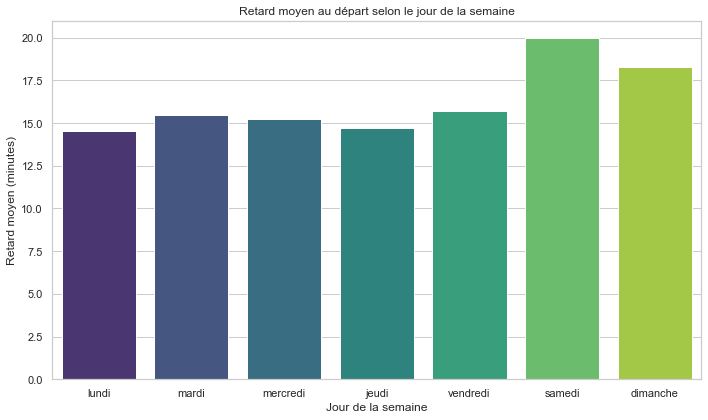

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['jour_semaine'] = df['date'].dt.day_name()
 
# Traduction en français
jour_trad = {
    'Monday': 'lundi',
    'Tuesday': 'mardi',
    'Wednesday': 'mercredi',
    'Thursday': 'jeudi',
    'Friday': 'vendredi',
    'Saturday': 'samedi',
    'Sunday': 'dimanche'
}
df['jour_semaine'] = df['jour_semaine'].map(jour_trad)
 
# Calcul du retard moyen par jour
retard_par_jour = (
    df.groupby('jour_semaine')['retard_depart_min']
    .mean()
    .reindex(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
    .reset_index()
)
 
# Tracer le graphique avec une palette de couleurs
plt.figure(figsize=(10, 6))
sns.barplot(data=retard_par_jour, x='jour_semaine', y='retard_depart_min', palette='viridis')
plt.title("Retard moyen au départ selon le jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Retard moyen (minutes)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Nombre de vols par compagnies et diagramme en barres du retard moyen par compagnie aérienne :

Transavia                      1127
Air France                      643
Vueling                         516
Iberia Airlines                 503
easyJet UK                      383
Qatar Airways                   215
Azul                            184
Air Caraibes                    122
Royal Air Maroc                 121
LATAM Airlines                  117
Air Corsica                     104
TAP Air Portugal                102
Air Europa                      102
Chalair                         100
sata-internacional               94
French Bee                       85
Volotea                          78
Corsair                          78
Aeromexico                       71
ITA Airways                      62
easyJet                          59
Amelia                           56
KM Malta Airlines                52
KLM                              49
British Airways                  42
Air Algerie                      37
Tunisair                         32
American Airlines           

Text(0, 0.5, 'Retard (min)')

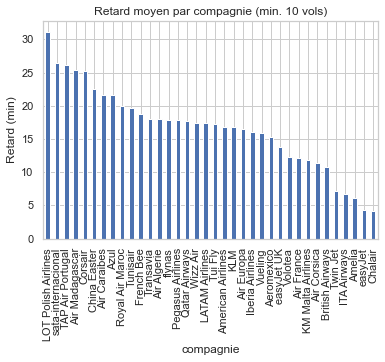

In [6]:
# Nb de vols par compagnie aérienne
print(df["compagnie"].value_counts())

# Retard moyen selon la compagnie lorsqu'ils ont un nb de vol minimum de 10
retards = df.groupby("compagnie").agg(
    retard_moyen=("retard_depart_min", "mean"),
    nb_vols=("compagnie", "count")
).sort_values("retard_moyen", ascending=False)

retards = retards[retards["nb_vols"] >= 10]  # on filtre les compagnies avec peu de vols

retards["retard_moyen"].plot(kind="bar")
plt.title("Retard moyen par compagnie (min. 10 vols)")
plt.ylabel("Retard (min)")


### Diagramme en barres du retard moyen en fonction du terminal au départ d'Orly :

<ipython-input-7-2090cf6a2776>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retard_par_terminal.index, y=retard_par_terminal.values, palette="coolwarm")


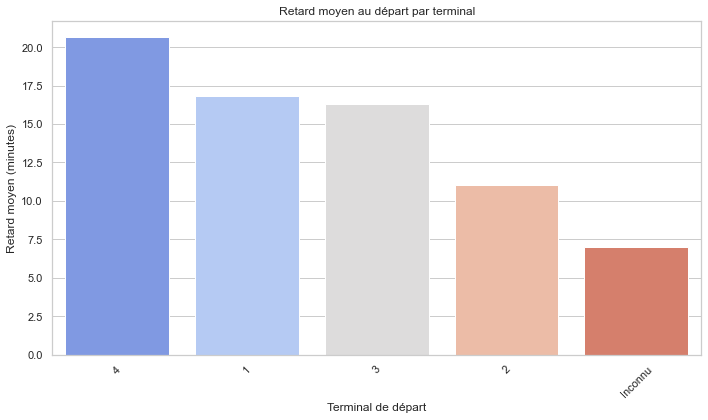

In [7]:
# Retard moyen en fonction du terminal de départ

# Grouper et calculer le retard moyen par terminal
retard_par_terminal = df.groupby("terminal_depart")["retard_depart_min"].mean().dropna()

# Trier pour une meilleure lecture
retard_par_terminal = retard_par_terminal.sort_values(ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=retard_par_terminal.index, y=retard_par_terminal.values, palette="coolwarm")
plt.title("Retard moyen au départ par terminal")
plt.xlabel("Terminal de départ")
plt.ylabel("Retard moyen (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Graphique de régression linéaire et graphe hexagonal de densité du retard en fonction de la température :

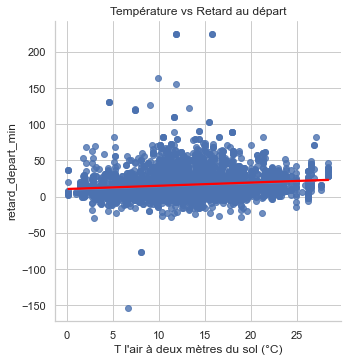

In [8]:
# Retard en fonction de la météo
# Relation entre température et retard de départ ?

sns.lmplot(data=df, x="T l'air à deux mètres du sol (°C)", y='retard_depart_min', line_kws={'color': 'red'})
plt.title("Température vs Retard au départ")
plt.show()


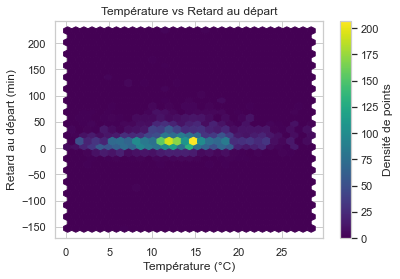

In [9]:
plt.hexbin(df["T l'air à deux mètres du sol (°C)"], df['retard_depart_min'], gridsize=30, cmap='viridis')
plt.colorbar(label='Densité de points')
plt.xlabel("Température (°C)")
plt.ylabel("Retard au départ (min)")
plt.title("Température vs Retard au départ")
plt.show()

### Nuage de points de chaque vol placé en fonction de la pluie moyenne par heure et du retard au départ :

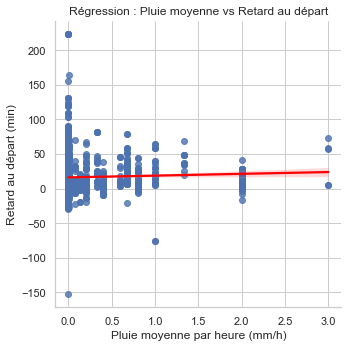

In [10]:
import seaborn as sns

sns.lmplot(data=df, x="Pluie_moyenne_par_heure", y="retard_depart_min", line_kws={"color": "red"})
plt.xlabel("Pluie moyenne par heure (mm/h)")
plt.ylabel("Retard au départ (min)")
plt.title("Régression : Pluie moyenne vs Retard au départ")
plt.tight_layout()
plt.show()


### Nuage de points de chaque vol en fonction de la variation de pression sur 3 heures et du retard :

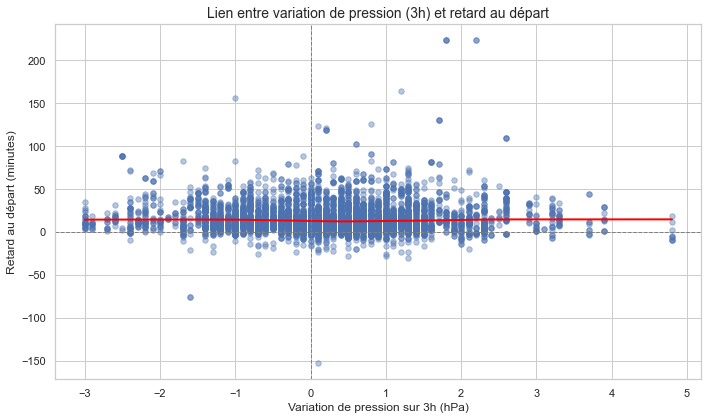

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer les données valides
df_corr = df[["Variation_pression_3h", "retard_depart_min"]].dropna()

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Nuage de points + courbe de régression LOWESS (lissage local)
sns.regplot(
    data=df_corr,
    x="Variation_pression_3h",
    y="retard_depart_min",
    lowess=True,
    scatter_kws={"alpha": 0.4, "s": 30},
    line_kws={"color": "red", "linewidth": 2}
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.title("Lien entre variation de pression (3h) et retard au départ", fontsize=14)
plt.xlabel("Variation de pression sur 3h (hPa)", fontsize=12)
plt.ylabel("Retard au départ (minutes)", fontsize=12)
plt.tight_layout()
plt.show()


### Nuage de points de chaque vol placé en fonction de la visibilité et du retard au départ :

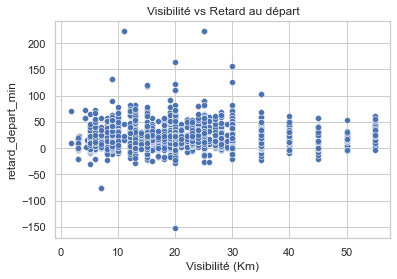

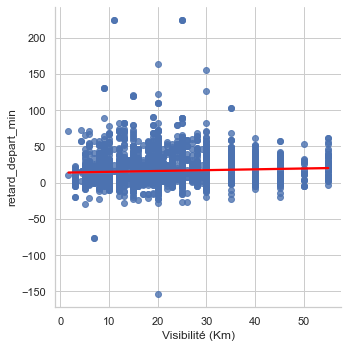

In [12]:
# Effet de la visibilité sur les retards

sns.scatterplot(data=df, x="Visibilité (Km)", y="retard_depart_min")
plt.title("Visibilité vs Retard au départ")

# Ajout d'une tendance linéaire
sns.lmplot(data=df, x="Visibilité (Km)", y='retard_depart_min', line_kws={'color': 'red'})


In [13]:
# Jour de la semaine
df['jour_semaine'] = df['heure_depart_reelle_dt'].dt.dayofweek
df['weekend'] = df['jour_semaine'].isin([5, 6]).astype(int)

# Heure de départ (utile pour déterminer l'heure creuse)
df['heure_depart'] = df['heure_depart_reelle_dt'].dt.hour
df['nuit'] = df['heure_depart'].apply(lambda x: 1 if x < 6 or x > 22 else 0)


Text(0.5, 1.0, 'Corrélation entre météo et retard')

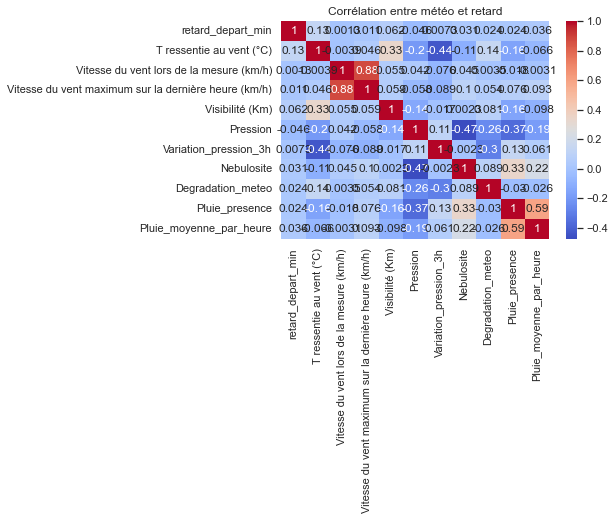

In [14]:
# Matrice de corélation entre le retard et les éléments météo

# Matrice de corélation entre le retard et les éléments météo

corr = df[["retard_depart_min","T ressentie au vent (°C)","T du point de rosée (°C)","Vitesse du vent lors de la mesure (km/h)","Vitesse du vent maximum sur la dernière heure (km/h)","Humidité relative (%)","Visibilité (Km)","Pression","Variation_pression_3h","Nebulosite","Degradation_meteo","Pluie_presence","Pluie_moyenne_par_heure","Intensite_pluie"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corrélation entre météo et retard")

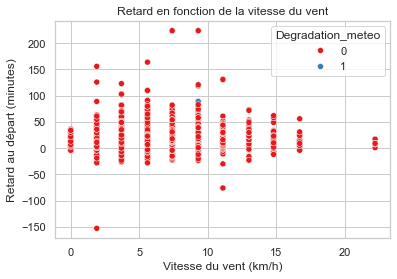

In [15]:
sns.scatterplot(data=df, x="Vitesse du vent lors de la mesure (km/h)", y="retard_depart_min", hue="Degradation_meteo", palette="Set1")
plt.title("Retard en fonction de la vitesse du vent")
plt.xlabel("Vitesse du vent (km/h)")
plt.ylabel("Retard au départ (minutes)")
plt.show()
